# CSCI 520: Neural Networks in Machine Learning 
## Aastha Ghimire
### PS0

## Basic Image Data Analysis Using Numpy and OpenCV - Part 1

### Importing image

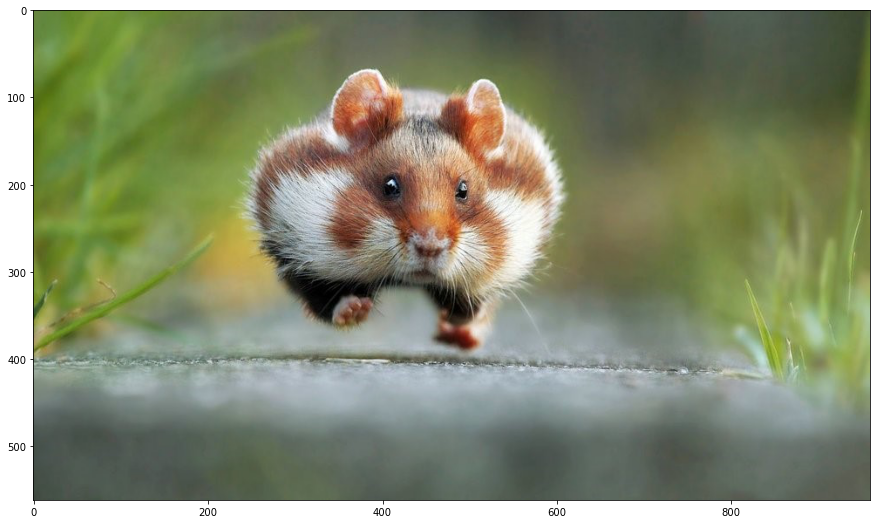

In [1]:
if __name__ == "__main__":
    import imageio
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    pic = imageio.imread('demo_2.jpg')
    plt.figure(figsize = (15, 15))
    
    plt.imshow(pic)

### Observe Basic Properties of Image

In [2]:
print('Type of the image : ', type(pic))
print()
print('Shape of the image: {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image: (562, 960, 3)
Image Height 562
Image Width 960
Dimension of Image 3


In [3]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [4]:
pic[100, 50]

Array([109, 143,  46], dtype=uint8)

In [5]:
# A specific pixel located at Row: 100; Column: 50
# Each channel's value of it, gradually R, G, B

print('Value of only R channel {}'.format(pic[100, 50, 0]))
print('Value of only G channel {}'.format(pic[100, 50, 1]))
print('Value of only B channel {}'.format(pic[100, 50, 2]))

Value of only R channel 109
Value of only G channel 143
Value of only B channel 46


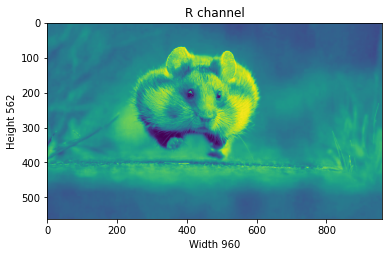

In [6]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 0])
plt.show()

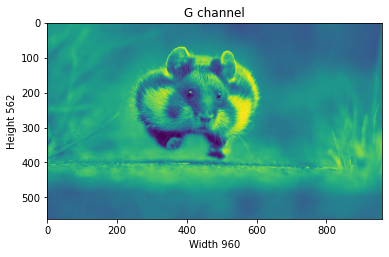

In [7]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 1])
plt.show()

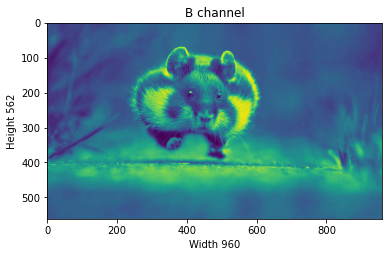

In [8]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 2])
plt.show()

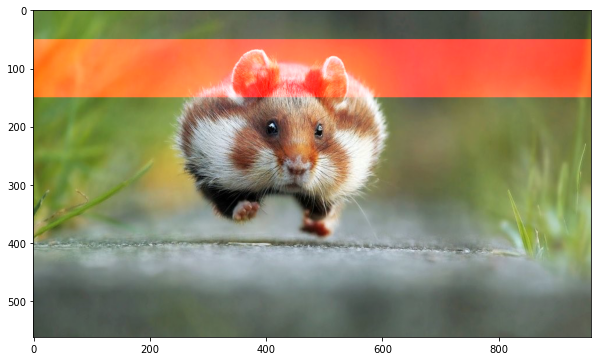

In [9]:
pic = imageio.imread('demo_2.jpg')
pic[50:150, : , 0] = 255 # full intensity to those pixel's R channel
plt.figure(figsize = (10, 10))
plt.imshow(pic)
plt.show()

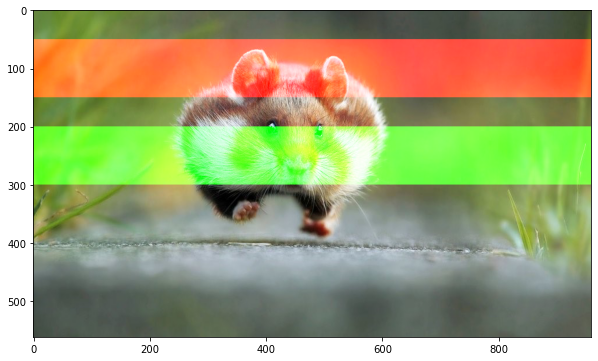

In [10]:
pic[200:300, : , 1] = 255 # full intensity to those pixel's G channel
plt.figure( figsize = (10, 10))
plt.imshow(pic)
plt.show()

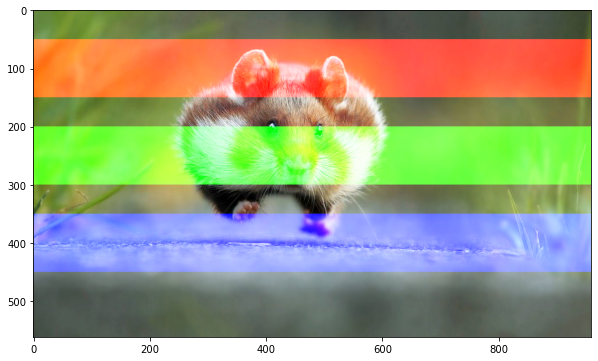

In [11]:
pic[350:450, : , 2] = 255 # ful intensity to those pixel's B channel
plt.figure (figsize = (10, 10))
plt.imshow(pic)
plt.show()

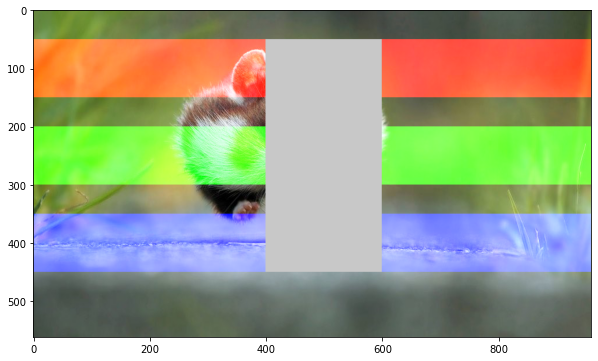

In [12]:
# Set value 200 of all channels to those pixels which turns them to white

pic[ 50:450, 400:600, [0,1,2] ] = 200
plt.figure (figsize = (10,10))
plt.imshow(pic)
plt.show()

### Splitting Layers

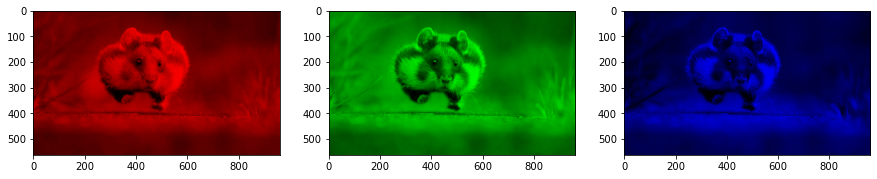

In [13]:
import numpy as np

pic = imageio.imread('demo_2.jpg')

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

for c, ax in zip(range(3), ax):

    # Create zero matrix
    split_img = np.zeros(pic.shape, dtype = "uint8") #'dtype' by default: 'numpy.float64'
    
    #Assing each channel
    split_img[ : , : , c] = pic[ : , : , c]
    
    # Display each channel
    ax.imshow(split_img)
    

### Greyscale

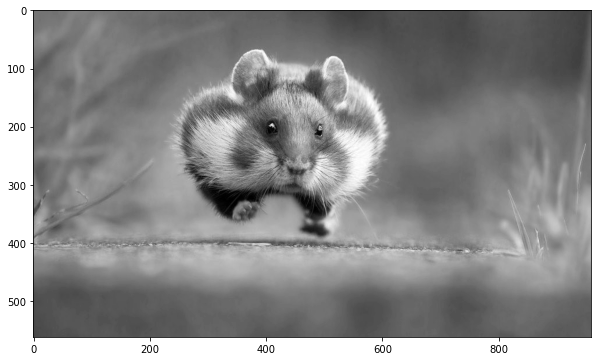

In [14]:
# Using this formula: Y' = 0.2999 R + 0.587 G + 0.114 B

pic = imageio.imread('demo_2.jpg')

gray = lambda rgb: np.dot( rgb[ ..., : 3] , [0.299, 0.587, 0.114] ) # Three dots used is called Ellipsis. Same as rgb [:,:,:3]
gray = gray(pic)

plt.figure( figsize = (10, 10) )
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()


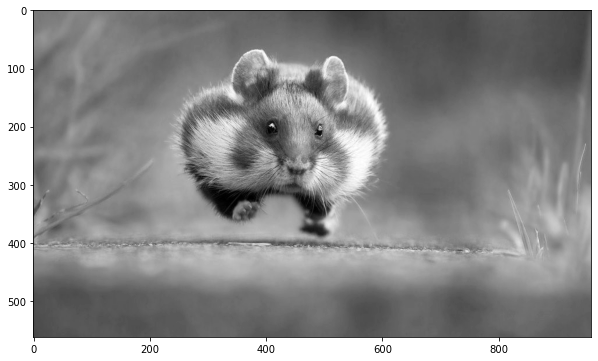

In [15]:
pic = imageio.imread('demo_2.jpg')

gray = lambda rgb: np.dot( rgb[..., : 3], [0.21, 0.72, 0.07])
gray = gray(pic)

plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [16]:
print('Type of the image : ', type(gray))
print()

print('Shape of the image : {}'.format(gray.shape))
print('Image Height : {}'.format(gray.shape[0]))
print('Image Width : {}'.format(gray.shape[1]))
print('Dimension of Image : {}'.format(gray.ndim))
print()

print('Image size {}'.format(gray.size))
print('Maximum RGB value in this image {}'.format(gray.max()))
print('Minimum RGB value in this image {}'.format(gray.min()))
print('Random indexes [X,Y] : {}'.format(gray[100, 50]))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960)
Image Height : 562
Image Width : 960
Dimension of Image : 2

Image size 539520
Maximum RGB value in this image 254.99999999999997
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 129.07


## Preprocessing for Deep Learning: From covariance matrix to image whitening


In [17]:
# Preprocessing refers to all the transformations on the raw data before it is fed to the machine learning or deep learning algorithm.
# For instance, training a convolutional neural network on raw images will probably lead to bad classification performances. 
# The preprocessing is also important to speed up training (for instance, centering and scaling techniques).
# For this tutorial, the syllabus is:
# 1. Background
# 2. Preprocessing
# 3. Whitening images

### 1. Background (Page 1)

#### A. Variance and Covariance

In [18]:
# First things first: let's import some libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A =  np.array([[1, 2, 3], [5, 4, 1], [3, 8, 6]])
A

array([[1, 2, 3],
       [5, 4, 1],
       [3, 8, 6]])

In [19]:
# Calculate covariance using NumPy

np.cov(A, rowvar = False, bias = True)

array([[ 2.66666667,  1.33333333, -1.33333333],
       [ 1.33333333,  6.22222222,  3.77777778],
       [-1.33333333,  3.77777778,  4.22222222]])

In [20]:
# Finding covariance matrix with the dot product

def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X) / len(X)
    return covariance

calculateCovariance(A)

array([[ 2.66666667,  1.33333333, -1.33333333],
       [ 1.33333333,  6.22222222,  3.77777778],
       [-1.33333333,  3.77777778,  4.22222222]])

#### B. Visualize data and covariance matrices

In [21]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar = False, bias = True)
    print ('Covariance matrix:\n', ACov)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    fig.set_size_inches(10, 10)
    
    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap = cmap, vmin =0)
    
    ax1 = plt.subplot (2, 2, 2)
    
    # data can include the colors
    if data.shape[1] == 3 :
        c = data[ : , 2]
    else : 
        c = "#0A98BE"
    ax1.scatter(data[ : , 0], data[ : , 1], c = c, s = 40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)     

#### C. Simulating data

##### Uncorrelated data

In [22]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [23]:
A[ :10, : ]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

C:\Users\aasth\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aasth\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


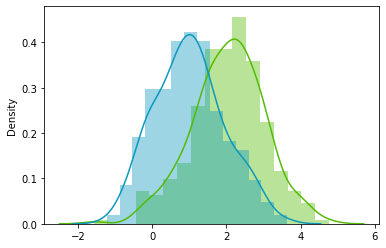

In [24]:
sns.distplot(A[ : , 0], color = "#53BB04")
sns.distplot(A[ : , 1], color = "#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


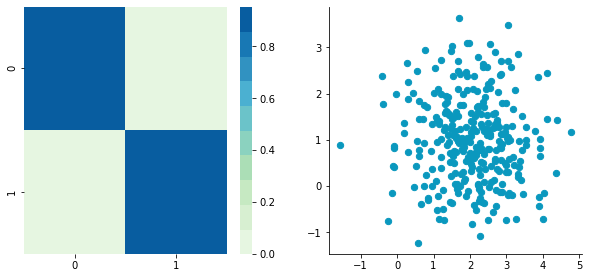

In [25]:
plotDataAndCov(A)
plt.show()
plt.close()

##### Correlated data

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


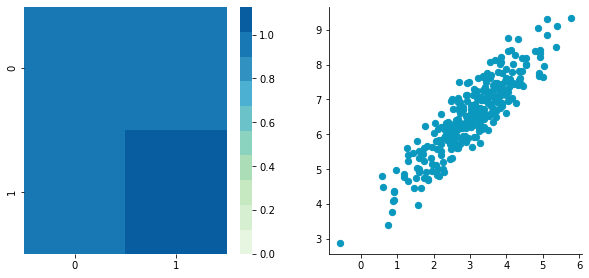

In [26]:
np.random.seed(1234)
b1 = np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300) / 2
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

### 2. Preprocessing (Page 2)

#### A. Mean normalization

In [27]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before: 


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


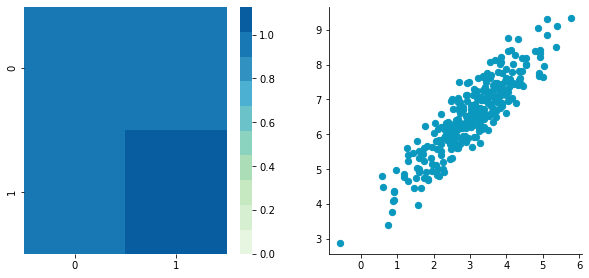

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


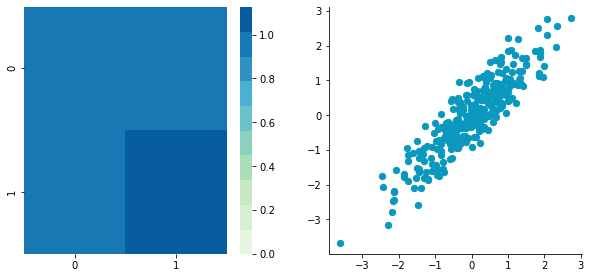

In [28]:
BCentered = center(B)

print('Before: \n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

#### B. Standaridization or normalization

In [29]:
def standardize(X):
    newX = center(X) / np.std(X, axis = 0)
    return newX

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


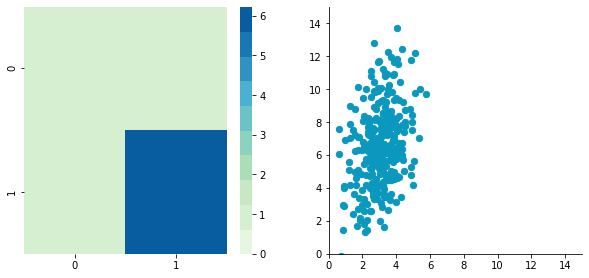

In [30]:
np.random.seed(1234)
c1 = np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300) / 2
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


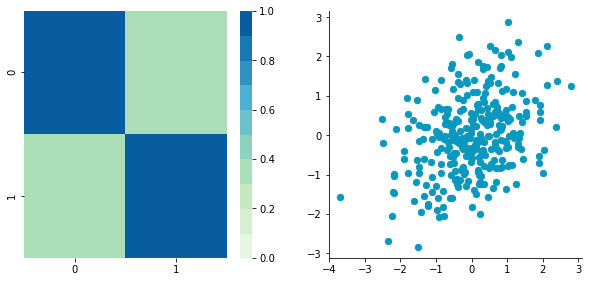

In [31]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

#### C. Whitening

##### 1. Zero centering


Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


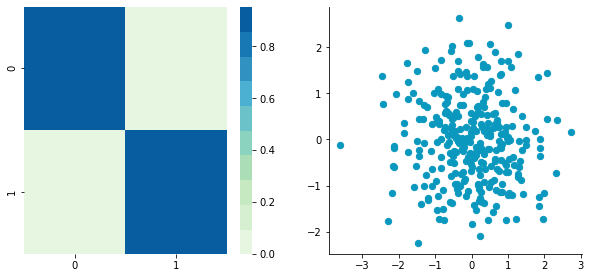

In [32]:
CCentered = center(A)

plotDataAndCov(CCentered)
plt.show()
plt.close()

##### 2. Decorrelate


In [33]:
def decorrelate(X):
    
    newX = center(X)
    cov = X.T.dot(X) / float(X.shape[0])
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    
    return decorrelated

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


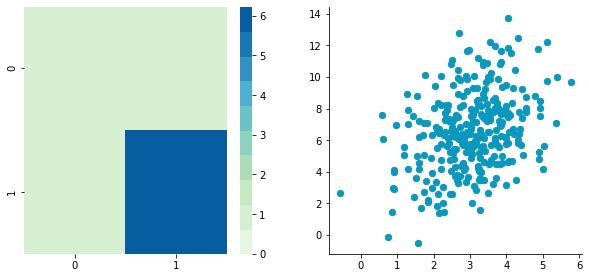

Covariance matrix:
 [[ 9.73152152e-01 -1.36927506e-16]
 [-1.36927506e-16  8.58162785e-01]]


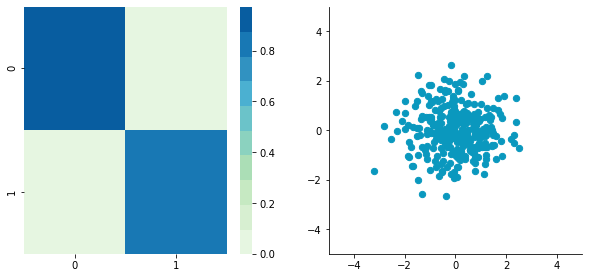

In [34]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close()

##### 3. Rescale the data

In [35]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X) / float(X.shape[0])
    
    # Calculate the eigenvalues adn eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance matrix:
 [[ 9.99989724e-01 -1.44328993e-16]
 [-1.44328993e-16  9.99988347e-01]]


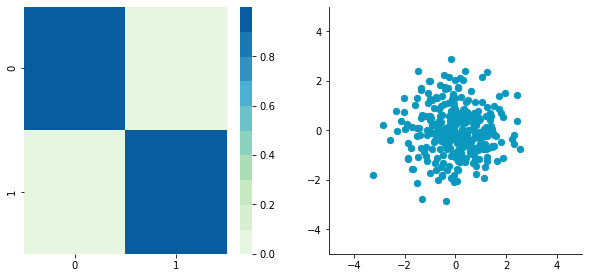

In [36]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
plt.close()

### 3. Whitening images (Page 3)


In [37]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [38]:
X = X_train[ : 1000]
print(X.shape)

(1000, 32, 32, 3)


In [39]:
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2] * X.shape[3])
print(X.shape)

(1000, 3072)


In [40]:
def plotImage(X):
    plt.figure(figsize = (1.5, 1.5))
    plt.imshow(X.reshape(32, 32, 3))
    plt.show()
    plt.close()

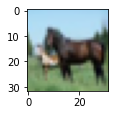

In [41]:
plotImage(X[12, : ])

In [42]:
X_norm = X / 255
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [43]:
X_norm.mean(axis = 0).shape

(3072,)

In [44]:
X_norm.mean(axis = 0)

array([0.5234    , 0.54323137, 0.5274    , ..., 0.50369804, 0.50011765,
       0.45227451])

In [45]:
X_norm = X_norm - X_norm.mean(axis = 0)

In [46]:
X_norm.mean(axis = 0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [47]:
cov = np.cov(X_norm, rowvar = False)
cov.shape

(3072, 3072)

In [48]:
U, S, V = np.linalg.svd(cov)
print (U.shape, S.shape)

(3072, 3072) (3072,)


In [49]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[5.46967832e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02861434e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24476904e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20778268e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.21171593e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.53626844e-15]]

shape: (3072, 3072)


In [50]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

In [51]:
# Rescaling the images

X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


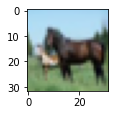

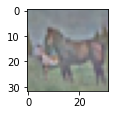

In [52]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, : ])

## Make Your Own Neural Network

### Part 2 - DIY with Python

#### Neural Network with Python

In [53]:
import numpy
#scipy.special for the sigmoid function expit()
import scipy.special

In [54]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21
        #w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
        pass
    
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # covert inputs list to 2d array
        inputs = numpy.array (inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndim = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_layers * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                        
        
        pass
        
    
    # query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2nd array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calcualte the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
    
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

#### The MNIST Dataset of Handwritten Numbers

##### Preparing the MNIST Training Data

In [55]:
data_file = open("mnist_dataset/mnist_train_100.csv",'r')
data_list = data_file.readlines()
data_file.close()

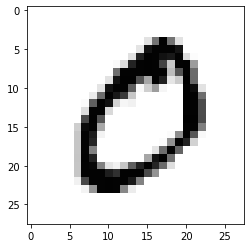

In [56]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [57]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

In [58]:
# output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [59]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

import numpy 
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [60]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21
        #w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
        pass
    
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # covert inputs list to 2d array
        inputs = numpy.array (inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                        
        
        pass
        
    
    # query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2nd array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calcualte the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
    
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [61]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data CSV file into a list 
training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural Network

# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1 : ]) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

##### Testing the Network

In [62]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [63]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # netowrk's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
1 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [64]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [65]:
# calculate the performance score, the fraction of correct answers 
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


##### Training and Testing with the Full Datasets

In [66]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data CSV file into a list 
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural Network

# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1 : ]) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [67]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [68]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # netowrk's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [69]:
#print(scorecard)
# calculate the performance score, the fraction of correct answers 
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9534


##### Final Code

In [70]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

import numpy 
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [71]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21
        #w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
        pass
    
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # covert inputs list to 2d array
        inputs = numpy.array (inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                        
        
        pass
        
    
    # query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2nd array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calcualte the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
    
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [72]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data CSV file into a list 
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural Network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the '.' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [73]:
# load the mnist test data CSV file into a list

test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [74]:
# test the neural network 

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # netowrk's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [75]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9731


### Part 3 - Even More Fun

#### Load your own images

In [76]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [77]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [78]:
import numpy
# library for plotting arrays
import matplotlib.pyplot
#ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [79]:
# our own image test data set
our_own_dataset = []

In [80]:
for image_file_name in glob.glob('my_own_images/pic?.png'):
    print ("loading ... ", image_file_name)
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    # load image data from png files into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    #print(record)
    our_own_dataset.append(record)
    pass

loading ...  my_own_images\pic1.png
0.01
1.0
[1.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01  

#### Neural Network MNIST and Own Data

In [81]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version trains using the MNIST dataset, then tests on our own images
# (c) Tariq Rashid, 2016
# license is GPLv2

In [82]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [83]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [84]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21
        #w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
                
        #learning rate
        self.lr = learningrate
        pass
    
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # covert inputs list to 2d array
        inputs = numpy.array (inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))                                        
        
        pass
        
    
    # query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2nd array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calcualte the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
    
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [85]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [86]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [87]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [88]:
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/pic?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

loading ...  my_own_images\pic1.png
0.01
1.0
loading ...  my_own_images\pic2.png
0.01
1.0
loading ...  my_own_images\pic3.png
0.01
0.93011767
loading ...  my_own_images\pic4.png
0.01
0.86800003
loading ...  my_own_images\pic5.png
0.01
1.0
loading ...  my_own_images\pic6.png
0.01
1.0
loading ...  my_own_images\pic7.png
0.14588237
0.77482355


[[7.60333265e-04]
 [1.99200734e-03]
 [1.70521658e-02]
 [2.39609944e-03]
 [9.26987214e-01]
 [4.92684041e-03]
 [1.48445934e-02]
 [4.57360787e-02]
 [1.56145553e-03]
 [2.58159429e-03]]
network says  4
no match!


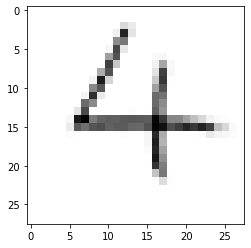

In [89]:
# test the neural network with our own images

# record to test
item = 2

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

#### Neural Network  MNIST backquery

In [90]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version asks the network what the image should be, given a label
# (c) Tariq Rashid, 2016
# license is GPLv2

In [91]:
import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [92]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [93]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [94]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [95]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [96]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [97]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [98]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9742


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


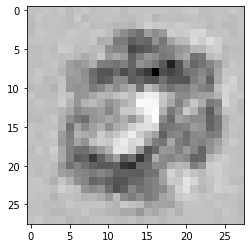

In [99]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

#### Creating new training data: Rotations

In [100]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# this version creates additional training examples by rotating each original by +/- 10 degrees
# (c) Tariq Rashid, 2016
# license is GPLv2

In [101]:
# numpy provides arrays and useful functions for working with them
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# scipy.ndimage for rotating image arrays
import scipy.ndimage

In [102]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [103]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [104]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [105]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass

In [106]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [107]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [108]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9758
